In [8]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import gridspec
import tensorflow as tf
from ntm_cell import NTMCell
from ntm import NTM
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import tasks.copy as tc
input_dim=10
output_dim=10

sess = tf.InteractiveSession()

scope='NTM-copy'
cell = NTMCell(input_dim=input_dim, output_dim=output_dim)
ntm = NTM(cell, sess, 1, 10, 100, forward_only=True, scope=scope)

ntm.load('checkpoint', 'copy')

 [*] Building a NTM model
Percent: [####################] 100.00% Finished.
 [*] Build a NTM model finished
 [*] Reading checkpoints...
INFO:tensorflow:Restoring parameters from checkpoint/copy_10/NTM-copy_copy.model-3402


In [3]:
tc.run(ntm, 5, sess)

 true output : 
     # ###
    # # # 
   ## ####
      #  #
   ## ##  
 predicted output :
     # ###
    # # # 
   ## ####
      #  #
   ## ##  
 Loss : 0.078077


In [9]:
def plot(ntm, seq_length, sess):
    seq, outputs, read_w, write_w, loss = tc.run(ntm, seq_length, sess, print_=False)
    read_w[0] = np.squeeze(read_w[0])
    write_w[0] = np.squeeze(write_w[0])

    shape2 = list(np.array(outputs).shape)
    shape2[0] += 2

    shape3 = list(np.array(read_w).shape)
    shape3[0] += 2

    z1 = np.zeros_like(outputs)
    z2 = np.zeros(shape2)

    s1 = np.zeros_like(seq[0]); s1[0]=1
    s2 = np.zeros_like(seq[0]); s2[1]=1

    seq = [s1] + seq + [s2]

    seq = np.r_[np.array(seq), z1]
    outputs = np.r_[z2, outputs]

    if seq_length >= 80:
        fig = plt.figure(1,figsize=(20,16))
        gs = gridspec.GridSpec(4, 1, height_ratios=[0.4, 0.4, 1.6, 1.6])
    elif seq_length >= 60:
        fig = plt.figure(1,figsize=(20,14))
        gs = gridspec.GridSpec(4, 1, height_ratios=[0.6, 0.6, 1.4, 1.4])
    elif seq_length >= 50:
        fig = plt.figure(1,figsize=(20,14))
        gs = gridspec.GridSpec(4, 1, height_ratios=[0.8, 0.8, 1.2, 1.2])
    elif seq_length >= 20:
        fig = plt.figure(1,figsize=(20,14))
        gs = gridspec.GridSpec(4, 1, height_ratios=[0.9, 0.9, 1.1, 1.1])
    else:
        fig = plt.figure(1,figsize=(20,10))
        gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 1])

    ax0 = plt.subplot(gs[0])
    ax0.imshow(seq.T, interpolation='nearest')
    ax0.set_ylabel('input')
    
    ax1 = plt.subplot(gs[1])
    ax1.imshow(outputs.T, interpolation='nearest')
    ax1.set_xlabel('time')
    ax1.set_ylabel('output')
    
    ax2 = plt.subplot(gs[2])
    ax2.imshow(read_w[1:-1], cmap='Greys', interpolation='nearest')
    ax2.set_xlabel('write weight')
    ax2.set_ylabel('time')
    
    ax3 = plt.subplot(gs[3])
    ax3.imshow(read_w[1:-1], cmap='Greys', interpolation='nearest')
    ax3.set_xlabel('read weight')
    ax3.set_ylabel('time')

    print("Loss : %f" % loss)

Loss : 0.059506


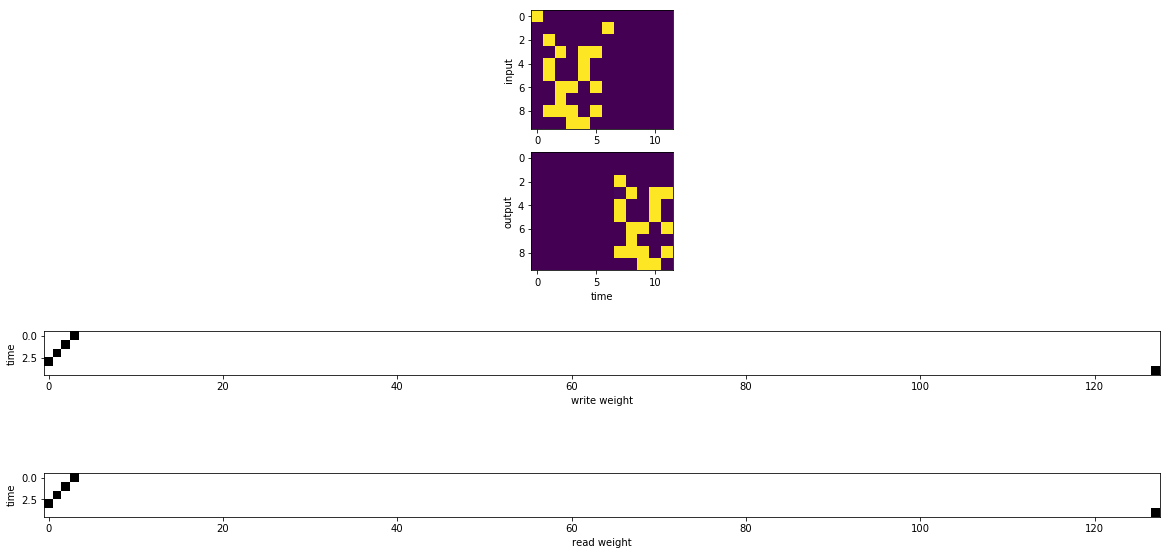

In [10]:
plot(ntm, 5, sess)

Loss : 0.112135


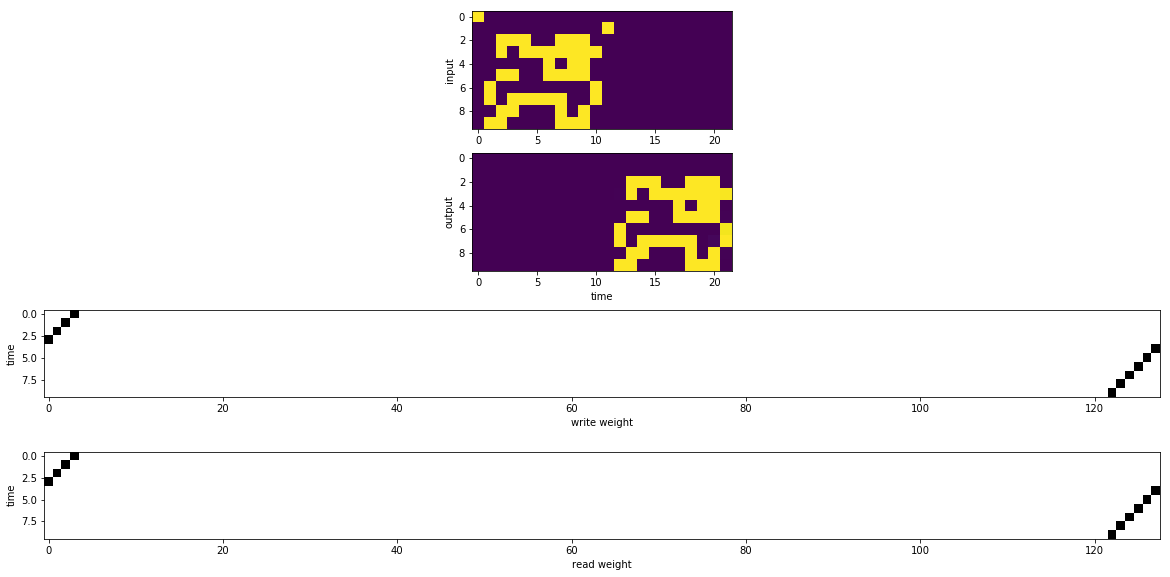

In [11]:
plot(ntm, 10, sess)

Loss : 259.159180


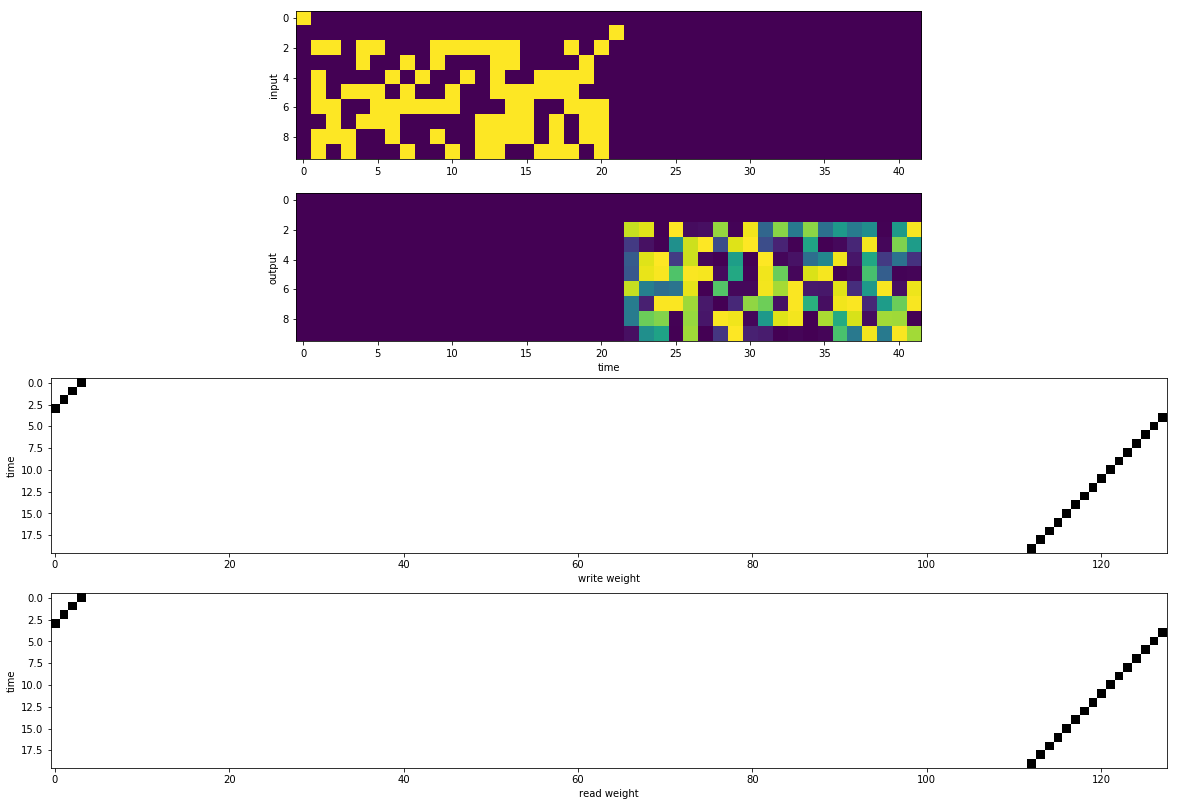

In [12]:
plot(ntm, 20, sess)

Loss : 1.226099


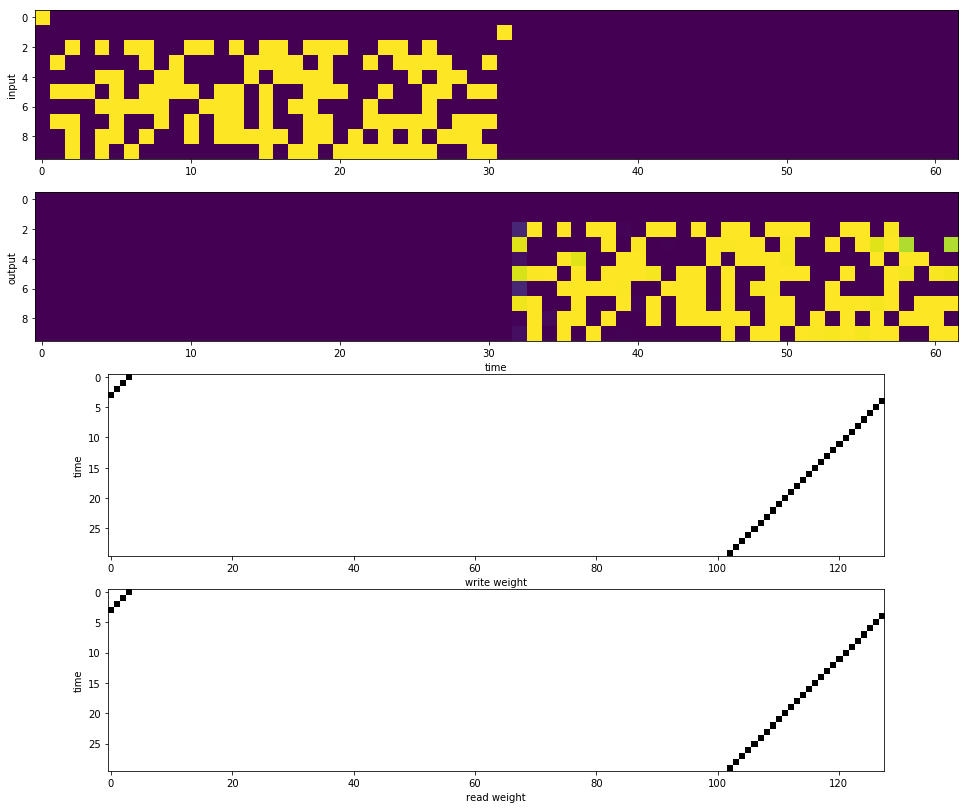

In [13]:
plot(ntm, 30, sess)

Loss : 28.688026


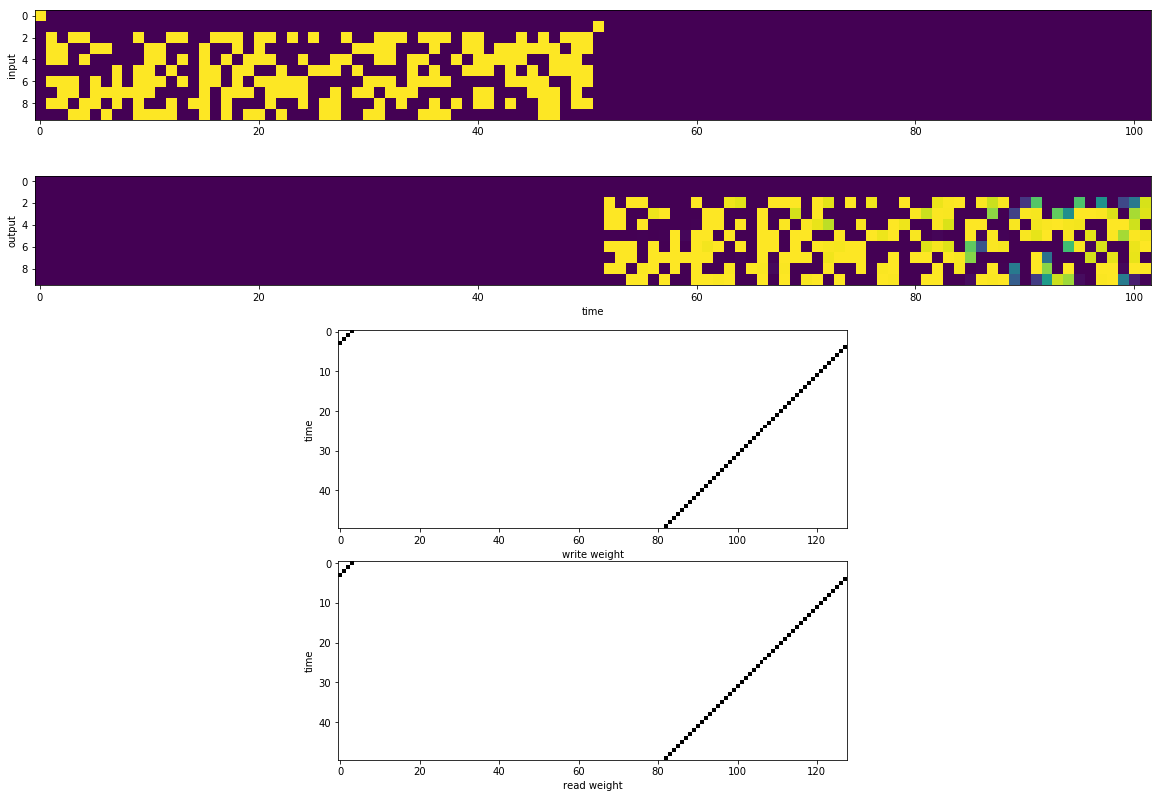

In [14]:
plot(ntm, 50, sess)

Loss : 1671.270752


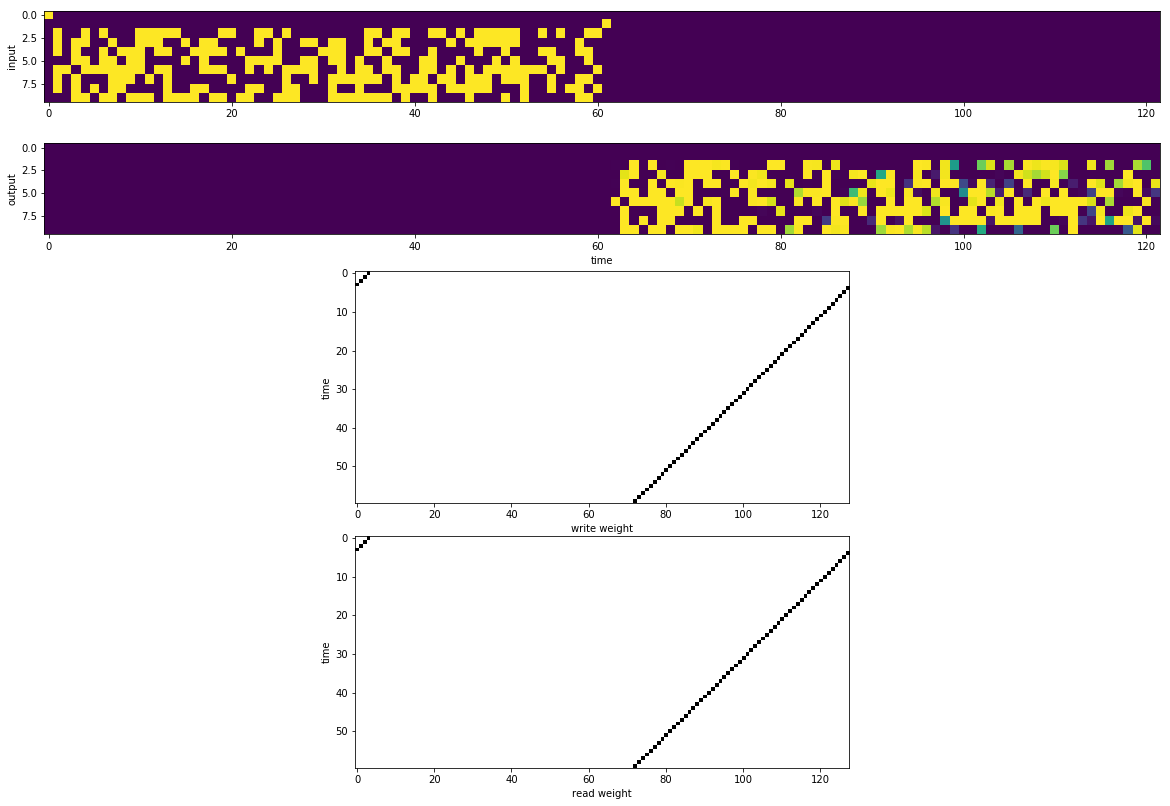

In [15]:
plot(ntm, 60, sess)

Loss : 6.867233


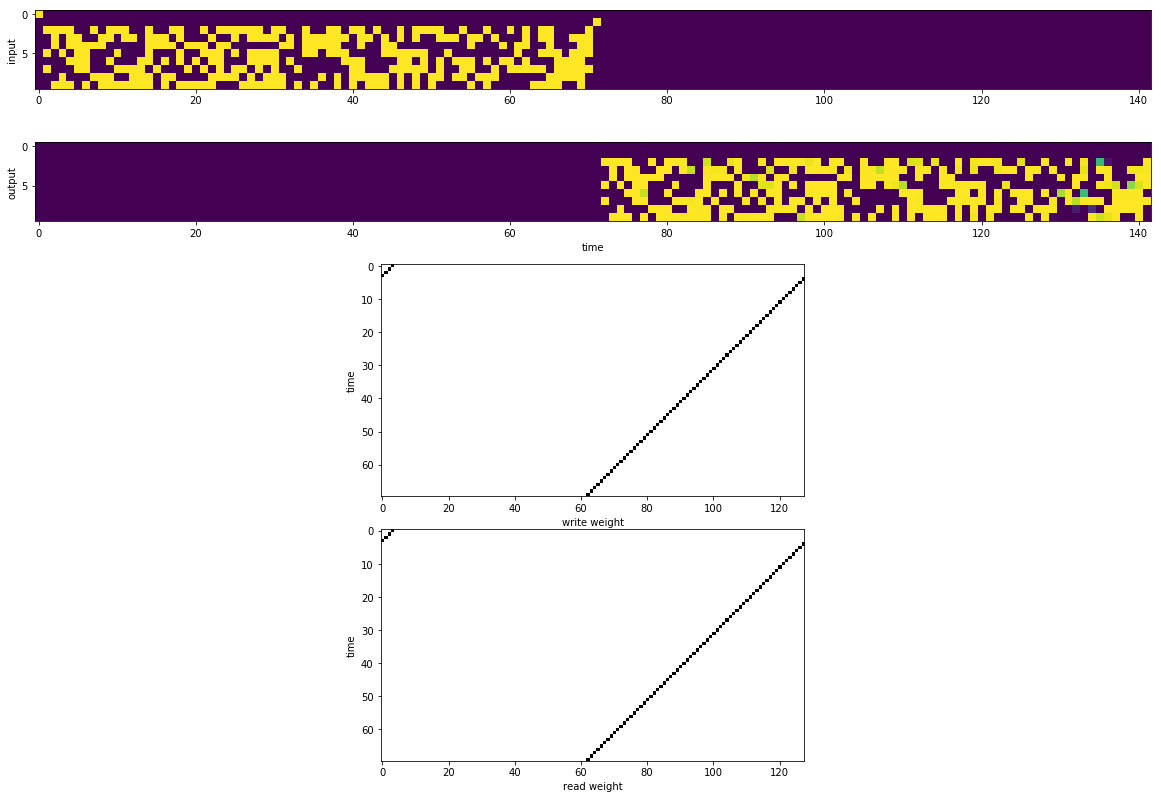

In [16]:
plot(ntm, 70, sess)

Loss : 0.002402


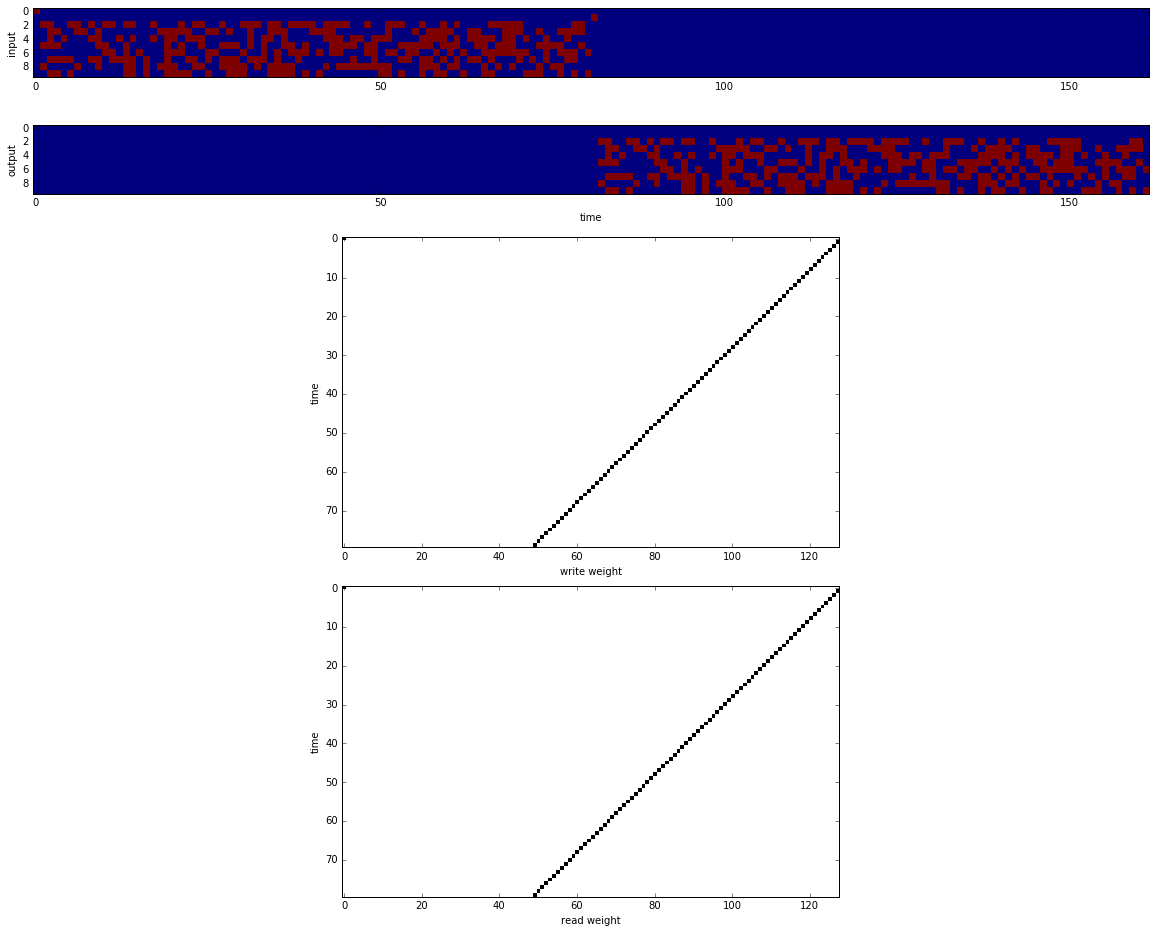

In [40]:
plot(ntm, 80, sess)

Loss : 1113.521484


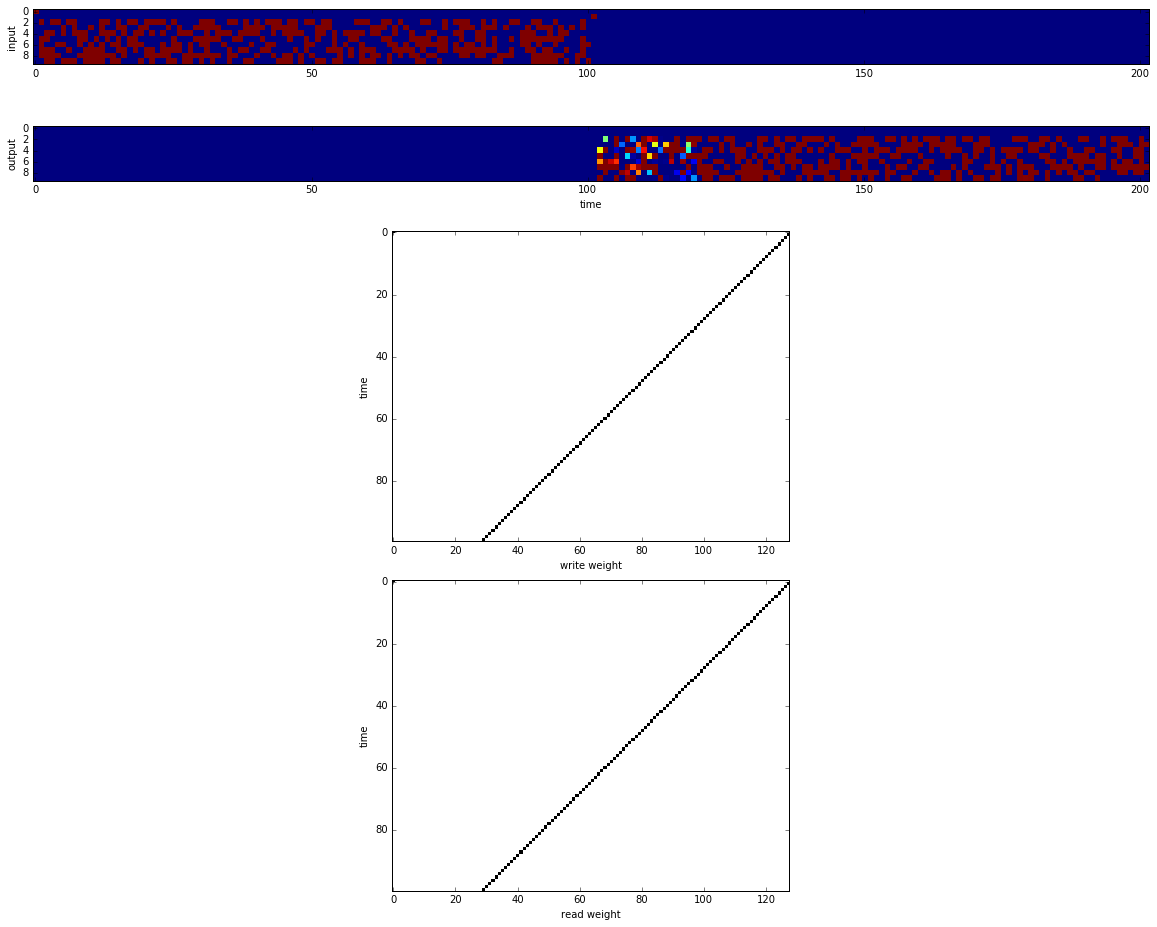

In [44]:
plot(ntm, 100, sess)